Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from fbprophet import Prophet

Load the data set

In [2]:
df = pd.read_csv("/content/drive/MyDrive/owid-covid-data.csv")

Exploratery data analysis (EDA).

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
#drop the column
df.drop(['iso_code', 'continent'], axis = 1,inplace=True)

In [5]:
#define the top of head
df.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


Summarization

In [6]:
#how to check column for over all data set
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 

In [7]:
#define information of this data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117021 entries, 0 to 117020
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   location                               117021 non-null  object 
 1   date                                   117021 non-null  object 
 2   total_cases                            111277 non-null  float64
 3   new_cases                              111274 non-null  float64
 4   new_cases_smoothed                     110259 non-null  float64
 5   total_deaths                           100616 non-null  float64
 6   new_deaths                             100771 non-null  float64
 7   new_deaths_smoothed                    110259 non-null  float64
 8   total_cases_per_million                110690 non-null  float64
 9   new_cases_per_million                  110687 non-null  float64
 10  new_cases_smoothed_per_million         109677 non-null  

In [8]:
#short information of this data set
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117021 entries, 0 to 117020
Columns: 60 entries, location to excess_mortality
dtypes: float64(57), object(3)
memory usage: 53.6+ MB


In [9]:
#define Correlation
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.841849,0.855662,0.987059,0.801318,0.823387,0.115881,0.039808,0.047677,0.135296,0.038394,0.056546,-0.001190,7.352939e-01,1.553443e-01,0.676609,0.043412,0.462691,0.089746,0.704820,0.055870,0.794749,0.959577,0.071235,0.027363,0.818657,0.029678,-0.002227,-0.035063,0.772544,0.811556,0.744744,0.416619,0.794556,0.807938,0.018594,0.011488,-0.022801,-0.210711,0.034973,0.057074,0.651600,-0.016009,0.031974,0.028684,0.025521,0.015560,-0.034527,-0.036186,0.018905,-0.003331,-0.009362,3.241135e-02,-0.007873,0.020660,0.035845,0.040956
new_cases,0.841849,1.000000,0.987559,0.845592,0.930431,0.924428,0.063489,0.085484,0.086504,0.079121,0.069929,0.086124,0.014553,9.063552e-01,2.880248e-01,0.886646,0.162282,0.618936,0.189781,0.863715,0.148760,0.743147,0.600320,0.017722,0.020596,0.737385,0.019591,0.103251,-0.038746,0.579037,0.596953,0.562503,0.330168,0.653438,0.653106,-0.057175,-0.072955,-0.084821,-0.190169,-0.008230,0.095279,0.731330,-0.017803,0.033772,0.029157,0.025623,0.013418,-0.037961,-0.038806,0.020574,-0.008312,-0.007566,3.852518e-02,-0.010111,0.021649,0.037572,0.142707
new_cases_smoothed,0.855662,0.987559,1.000000,0.858379,0.925584,0.941171,0.065016,0.074090,0.087913,0.081509,0.066315,0.089590,0.010343,9.520468e-01,3.038997e-01,0.929202,0.171725,0.722082,0.257849,0.943900,0.159290,0.752077,0.613370,0.017981,0.019551,0.761636,0.020549,0.104525,-0.039535,0.587363,0.604867,0.572782,0.338487,0.656674,0.663217,-0.058404,-0.074179,-0.086981,-0.193413,-0.007417,0.097971,0.741042,-0.018014,0.034106,0.029427,0.025860,0.013440,-0.038311,-0.039227,0.020834,-0.008432,-0.007742,3.883910e-02,-0.010272,0.021834,0.037912,0.128590
total_deaths,0.987059,0.845592,0.858379,1.000000,0.826259,0.848497,0.109405,0.034535,0.041307,0.166498,0.052222,0.068517,-0.002006,7.440118e-01,1.509333e-01,0.699732,0.052449,0.477210,0.037996,0.707343,0.045911,0.727673,0.872596,0.051298,0.012436,0.747239,0.012330,0.049069,-0.045603,0.728432,0.767815,0.709859,0.359196,0.751246,0.764897,0.009215,0.004727,-0.029719,-0.217009,0.032706,0.060902,0.660565,-0.019528,0.032394,0.028273,0.025629,0.009397,-0.041385,-0.042503,0.024460,-0.006035,-0.007243,3.987751e-02,-0.010335,0.023423,0.037896,0.154679
new_deaths,0.801318,0.930431,0.925584,0.826259,1.000000,0.977569,0.045621,0.060511,0.064940,0.092675,0.120598,0.126754,0.002819,8.683318e-01,3.506066e-01,0.888858,0.252579,0.620757,0.315352,0.829071,0.212730,0.665108,0.506872,-0.023860,-0.007429,0.643037,-0.012998,0.189514,-0.049863,0.512159,0.531578,0.480369,0.241183,0.612508,0.612084,-0.092687,-0.106576,-0.123903,-0.188344,-0.017408,0.130188,0.746166,-0.021765,0.031564,0.024261,0.020957,0.002372,-0.044764,-0.039735,0.027623,-0.013951,-0.000761,4.699385e-02,-0.012371,0.020732,0.036255,0.418981
new_deaths_smoothed,0.823387,0.924428,0.941171,0.848497,0.977569,1.00000

How to find unique values

In [10]:
print("unique values of location\n", df['location'].unique())

unique values of location
 ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' '

Count all the cases of covid-19

In [11]:
print("#location_wise total_cases",df.groupby('location')['total_cases'].count())
print("#location_wise new cases", df.groupby('location')['new_cases'].count())
print("#location wise total_deaths",df.groupby('location')['total_deaths'].count())
print("#location wise new_deaths",df.groupby('location')['new_deaths'].count())

#location_wise total_cases location
Afghanistan          570
Africa               580
Albania              556
Algeria              569
Andorra              563
                    ... 
Wallis and Futuna      0
World                603
Yemen                524
Zambia               547
Zimbabwe             545
Name: total_cases, Length: 233, dtype: int64
#location_wise new cases location
Afghanistan          570
Africa               581
Albania              556
Algeria              569
Andorra              563
                    ... 
Wallis and Futuna      0
World                603
Yemen                524
Zambia               547
Zimbabwe             545
Name: new_cases, Length: 233, dtype: int64
#location wise total_deaths location
Afghanistan          542
Africa               557
Albania              554
Algeria              553
Andorra              543
                    ... 
Wallis and Futuna      0
World                603
Yemen                504
Zambia               532
Zimba

Aggregation

In [12]:
# getting all minimum values from all columns in a dataframe
print(df.min())
print("-----------------------------------------")

# minimum value from a particular column in a data frame
print(df['total_cases'].min())
print("-----------------------------------------")
print(df['new_cases'].min())
print("-----------------------------------------")
print(df['total_deaths'].min())
print("-----------------------------------------")
print(df['new_deaths'].min())
print("-----------------------------------------")
# computing maximum values
print(df.max())
print("-----------------------------------------")

# computing sum
print(df.sum())
print("-----------------------------------------")

# finding count
print(df.count())
print("-----------------------------------------")


# computing standard deviation
print(df.std())
print("-----------------------------------------")

# computing variance
print(df.var())

location                                 Afghanistan
date                                      2020-01-01
total_cases                                        1
new_cases                                     -74347
new_cases_smoothed                             -6223
total_deaths                                       1
new_deaths                                     -1918
new_deaths_smoothed                         -232.143
total_cases_per_million                        0.001
new_cases_per_million                       -3125.83
new_cases_smoothed_per_million              -272.971
total_deaths_per_million                       0.001
new_deaths_per_million                       -75.911
new_deaths_smoothed_per_million              -10.844
reproduction_rate                              -0.02
icu_patients                                       0
icu_patients_per_million                           0
hosp_patients                                      0
hosp_patients_per_million                     

cleaning the countries analysis of Covid-19 cases

In [13]:
df.drop(df.index[(df['location'] == 'World')],axis=0,inplace=True)
df.drop(df.index[(df['location'] == 'Europe')],axis=0,inplace=True)
df.drop(df.index[(df['location'] == 'Asia')],axis=0,inplace=True)
df.drop(df.index[(df['location'] == 'European Union')],axis=0,inplace=True)

define all the cases of covid-19 Country by in "location"

In [14]:
df.groupby(['location'])['total_cases','new_cases','total_deaths','new_deaths'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,location,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,3.128046e+07,154283.0,1296860.0,7174.0
1,Africa,1.590760e+09,8099768.0,40639320.0,204361.0
2,Albania,3.468482e+07,159423.0,645103.0,2557.0
3,Algeria,4.547865e+07,200770.0,1302533.0,5630.0
4,Andorra,3.952942e+06,15108.0,46052.0,130.0
...,...,...,...,...,...
224,Vietnam,2.040171e+07,645640.0,425895.0,16186.0
225,Wallis and Futuna,0.000000e+00,0.0,0.0,0.0
226,Yemen,1.749624e+06,8527.0,389982.0,1612.0
227,Zambia,3.228625e+07,208161.0,510876.0,3636.0


Countries analysis-: Location_wise with most number of cases


In [15]:
location_wise = df.groupby('location')['total_cases','new_cases','total_deaths'].sum().reset_index()
location_wise["Death_percentage"] = ((location_wise['total_deaths'] / location_wise['total_cases']) * 100)
location_wise.drop(['total_deaths'],axis=1,inplace=True)
location_wise.style.background_gradient(cmap='twilight_shifted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,location,total_cases,new_cases,Death_percentage
0,Afghanistan,31280460.000000,154283.000000,4.145911
1,Africa,1590759616.000000,8099768.000000,2.554712
2,Albania,34684823.000000,159423.000000,1.859900
3,Algeria,45478652.000000,200770.000000,2.864054
4,Andorra,3952942.000000,15108.000000,1.165006
5,Angola,9341074.000000,51407.000000,2.426648
6,Anguilla,0.000000,0.000000,nan
7,Antigua and Barbuda,298534.000000,2304.000000,2.929650
8,Argentina,1019543819.000000,5232358.000000,2.262547
9,Armenia,67741427.000000,250559.000000,1.883440


Note -:  deaths are most in Mexico and peru. and least number of deaths Micronesia, soloman islands, palau, etc..

In [16]:
px.bar(x=location_wise.nlargest(10,'total_cases')['location'],
       y = location_wise.nlargest(10,'total_cases')['total_cases'],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Countries wise with most number of 'total_cases'")

Note -: Above bar plot show the maximum number of covid-19 cases in North America.

In [17]:
px.bar(x=location_wise.nlargest(10,'new_cases')['location'],
       y = location_wise.nlargest(10,'new_cases')['new_cases'],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Countries wise with most number of 'new_cases'")

Note-: Above bar plot repersent the maximum number of new_cases in North America.

Location_wise with least number of cases

In [18]:
px.bar(x=location_wise.nsmallest(10,'total_cases',keep='last')['location'],
       y = location_wise.nsmallest(10,'total_cases',keep='last')['total_cases'],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Countries wise with least number of 'total_cases'")

Note-: Above plot repersent the least number of covid-19 cases in country.

In [19]:
px.bar(x=location_wise.nsmallest(10,'new_cases',keep='last')['location'],
       y = location_wise.nsmallest(10,'new_cases',keep='last')['new_cases'],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Countries wise with least number of of 'new_cases'")

Note-: Above plot repersent the least number of covid-19 cases in the countries.

define the total number of cases and deaths in "India"

In [20]:
df1 = df[df['location']=='India']
df1.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
48394,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
48395,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
48396,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
48397,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
48398,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


define the Groupby wise for all cases

In [21]:
df1.groupby(['location'])['total_cases','new_cases','total_deaths','new_deaths'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,location,total_cases,new_cases,total_deaths,new_deaths
0,India,6.629604e+09,33347325.0,89133391.0,443928.0


Note-: total number of deaths cases in india -: 8913333

#Apply FbProphet

define the number of cases for the next 30 days.

In [22]:
total_cases = df.groupby('date').sum()['total_cases'].reset_index()
new_cases = df.groupby('date').sum()['new_cases'].reset_index()
total_deaths = df.groupby('date').sum()['total_deaths'].reset_index()
new_deaths = df.groupby('date').sum()['new_deaths'].reset_index()

define the number of cases for the next 30 days in 'total_cases'

In [23]:
total_cases.head()

,date,total_cases
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [24]:
total_cases.columns = ['ds', 'y']
total_cases['ds'] = pd.to_datetime(total_cases['ds'])

In [25]:
model=Prophet()
model.add_seasonality(name='monthly_total_cases', period=30.0, fourier_order=5, prior_scale=0.2)
model.fit(total_cases)
future = model.make_future_dataframe(periods=30, freq='D')#Making future prediction for next 30 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
644,2021-10-06
645,2021-10-07
646,2021-10-08
647,2021-10-09
648,2021-10-10
649,2021-10-11
650,2021-10-12
651,2021-10-13
652,2021-10-14
653,2021-10-15


Fitting the prophet model and summarize the forecast

In [26]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
624,2021-09-16,3.184221e+08,3.169603e+08,3.199638e+08
625,2021-09-17,3.191540e+08,3.176105e+08,3.207235e+08
626,2021-09-18,3.198448e+08,3.183457e+08,3.213330e+08
627,2021-09-19,3.204775e+08,3.189354e+08,3.221032e+08
628,2021-09-20,3.211446e+08,3.195975e+08,3.225618e+08
629,2021-09-21,3.218710e+08,3.202760e+08,3.235438e+08
630,2021-09-22,3.226277e+08,3.210737e+08,3.241853e+08
631,2021-09-23,3.233496e+08,3.218971e+08,3.250275e+08
632,2021-09-24,3.241395e+08,3.226203e+08,3.258642e+08
633,2021-09-25,3.248601e+08,3.232435e+08,3.264819e+08


plot the forecast

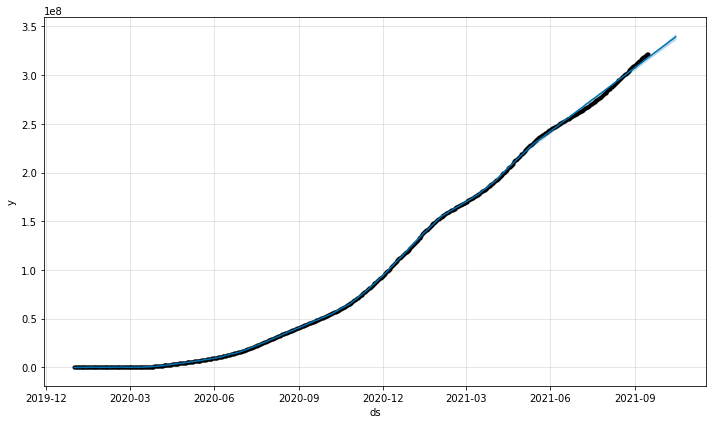

In [27]:
total_cases_forecast_plot = model.plot(forecast)

Note -: You can see above that not only is there an upward trend, but the trend keeps changing.

can look at the various components

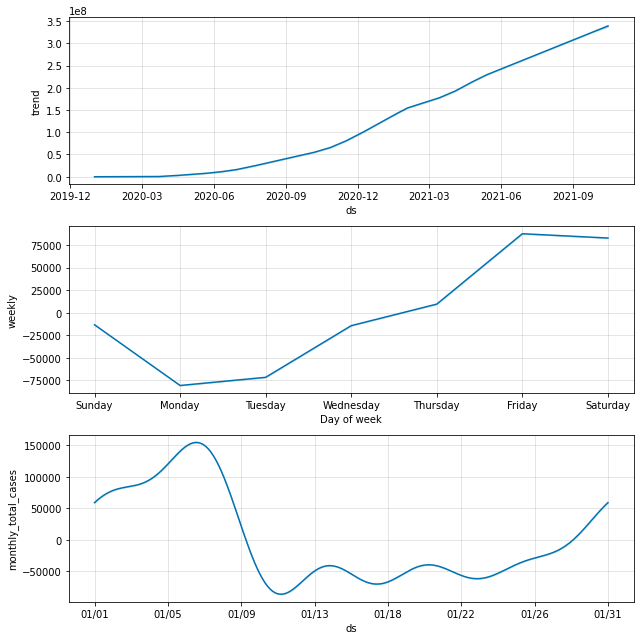

In [28]:
total_cases_forecast_plot = model.plot_components(forecast)

Notice -: Notice the dips 01/11, 01/06, 01/23. I assume not many workers were working on Christmas and New Year’s day, so reports dipped.

define the number of cases for the next 30 days in 'new_cases'

In [29]:
new_cases.head()

,date,new_cases
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [30]:
new_cases.columns = ['ds', 'y']
new_cases['ds'] = pd.to_datetime(new_cases['ds'])

In [31]:
model=Prophet(interval_width=0.95,changepoint_prior_scale=5)
model.add_seasonality(name="Monthly_new_cases", period=30.5, fourier_order=5, prior_scale=0.2)
model.fit(new_cases)
future = model.make_future_dataframe(periods=30, freq = "D")#Making future prediction for next 30 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
644,2021-10-06
645,2021-10-07
646,2021-10-08
647,2021-10-09
648,2021-10-10
649,2021-10-11
650,2021-10-12
651,2021-10-13
652,2021-10-14
653,2021-10-15


Fitting the prophet model

In [32]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
624,2021-09-16,918482.919193,746596.880266,1.101959e+06
625,2021-09-17,928599.384627,750752.873960,1.094447e+06
626,2021-09-18,844048.784794,668079.380936,1.020586e+06
627,2021-09-19,754620.151565,570475.570526,9.400737e+05
628,2021-09-20,786951.558259,611463.341735,9.573949e+05
629,2021-09-21,868371.530682,708328.517096,1.028028e+06
630,2021-09-22,916625.179655,753430.364983,1.094628e+06
631,2021-09-23,934281.027094,756362.642837,1.113457e+06
632,2021-09-24,943383.233165,753010.343217,1.128062e+06
633,2021-09-25,854822.356541,671052.631777,1.021526e+06


plot the forecast for the new cases

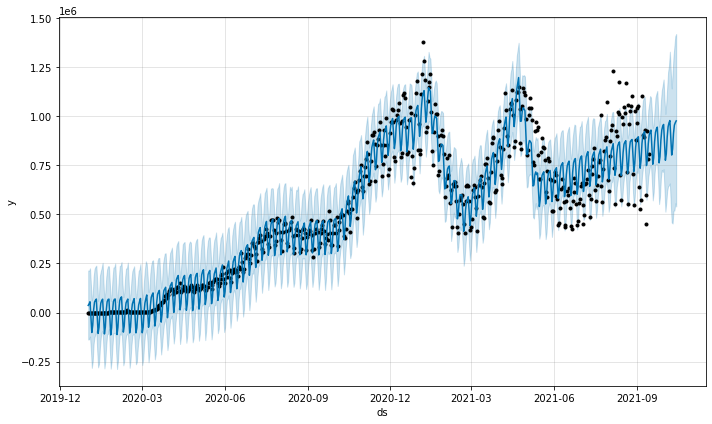

In [33]:
new_cases_forecast_plot = model.plot(forecast)

Note -: We can see above black dots are actually number of new_cases and the forecast is a blue line with upper and lower bounds in a blue shaded area.

can look at the various components

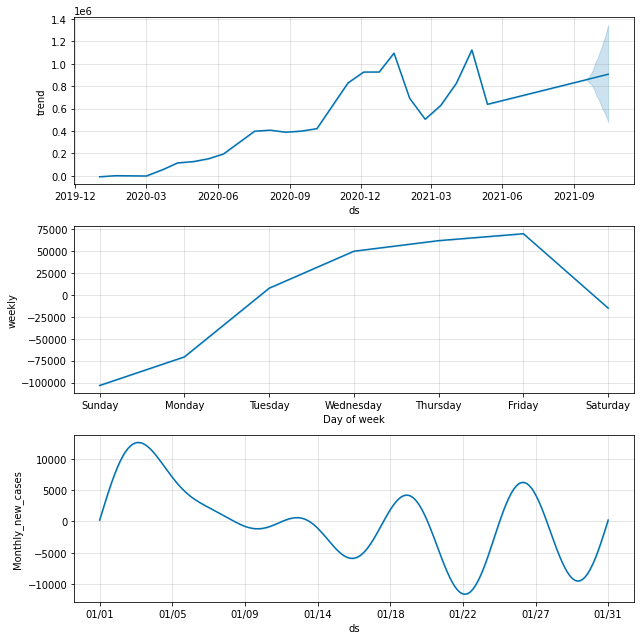

In [34]:
new_cases_forecast_plot = model.plot_components(forecast)

Notice -: Notice the dips 01/09, 01/16. There are also large dips on 01/29. I assume not many workers were working on Christmas and New Year’s day, so reports dipped.

define the number of cases for the next 30 days in 'total_deaths'

In [35]:
total_deaths.head()

,date,total_deaths
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [36]:
total_deaths.columns = ['ds', 'y']
total_deaths['ds'] = pd.to_datetime(total_deaths['ds'])

In [37]:
model=Prophet()
model.add_seasonality(name='Monthly_total_cases', period=30.5, fourier_order=5, prior_scale=0.2)
model.fit(total_deaths)
future = model.make_future_dataframe(periods=30, freq='D')#Making future prediction for next 30 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
644,2021-10-06
645,2021-10-07
646,2021-10-08
647,2021-10-09
648,2021-10-10
649,2021-10-11
650,2021-10-12
651,2021-10-13
652,2021-10-14
653,2021-10-15


Fitting the prophet model

In [38]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
624,2021-09-16,7.055799e+06,7.043032e+06,7.067531e+06
625,2021-09-17,7.071023e+06,7.059924e+06,7.082545e+06
626,2021-09-18,7.084412e+06,7.072064e+06,7.096123e+06
627,2021-09-19,7.095027e+06,7.082310e+06,7.107717e+06
628,2021-09-20,7.106664e+06,7.094100e+06,7.119378e+06
629,2021-09-21,7.122182e+06,7.109220e+06,7.135434e+06
630,2021-09-22,7.137612e+06,7.124728e+06,7.151183e+06
631,2021-09-23,7.152675e+06,7.139513e+06,7.166631e+06
632,2021-09-24,7.167247e+06,7.154041e+06,7.182118e+06
633,2021-09-25,7.179903e+06,7.164878e+06,7.195350e+06


plot the forecast for total_deaths

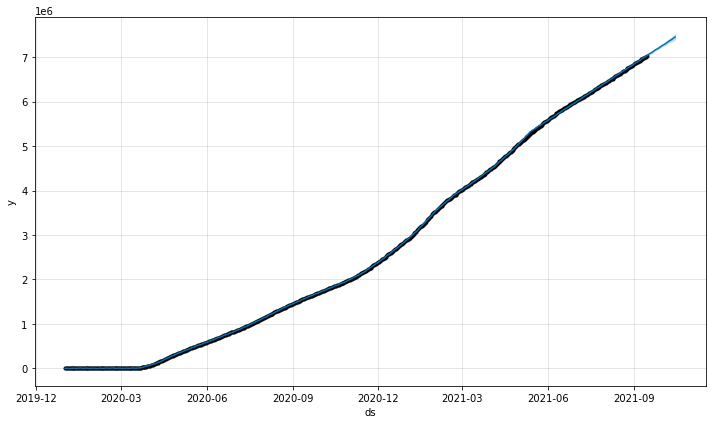

In [39]:
total_deaths_forecast_plot = model.plot(forecast)

Note -: You can see above that not only is there an upward trend, but the trend keeps changing.

can look at the various components

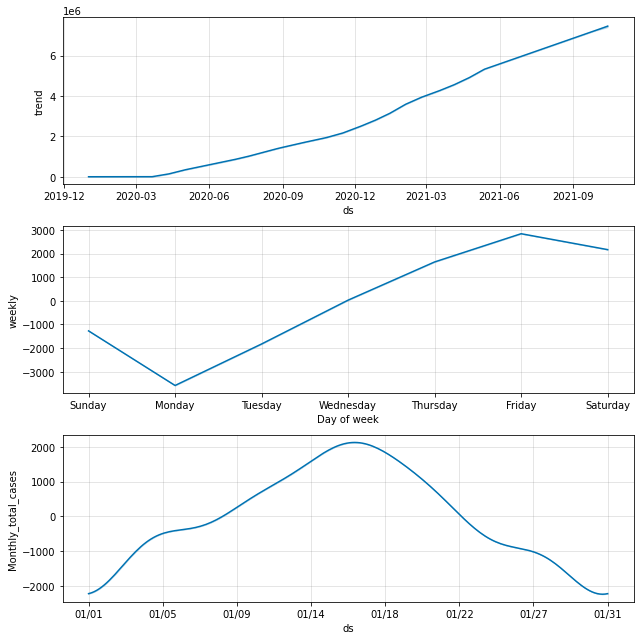

In [40]:
total_deaths_forecast_plot = model.plot_components(forecast)

Note-: 01/01 to 01/15 are increasing and 01/15 to 01/31 decreasing the cases.

define the number of cases for the next 30 days in 'new_deaths'

In [41]:
new_deaths.head()

,date,new_deaths
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


In [42]:
new_deaths.columns = ['ds', 'y']
new_deaths['ds'] = pd.to_datetime(new_deaths['ds'])

In [43]:
model=Prophet(interval_width=0.95,changepoint_prior_scale=5)
model.add_seasonality(name='Monthly_new_deaths', period=30.5, fourier_order=5, prior_scale=0.2)
model.fit(new_deaths)
future = model.make_future_dataframe(periods=30, freq='D')#Making future prediction for next 30 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
644,2021-10-06
645,2021-10-07
646,2021-10-08
647,2021-10-09
648,2021-10-10
649,2021-10-11
650,2021-10-12
651,2021-10-13
652,2021-10-14
653,2021-10-15


Fitting the prophet model

In [44]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
624,2021-09-16,13490.295598,10390.234620,16878.447300
625,2021-09-17,13040.148887,9635.884317,16431.842663
626,2021-09-18,11253.920465,7963.952130,14865.681555
627,2021-09-19,8607.047317,5142.166321,11759.591062
628,2021-09-20,9781.979938,6294.931536,13370.189716
629,2021-09-21,13624.240291,10105.095503,17232.423582
630,2021-09-22,13807.180860,10356.005281,17287.553163
631,2021-09-23,13438.348294,9914.768365,17154.020428
632,2021-09-24,12924.009217,9137.548651,16725.202167
633,2021-09-25,11010.658515,7369.917114,14867.698243


plot the forecast for new_deaths

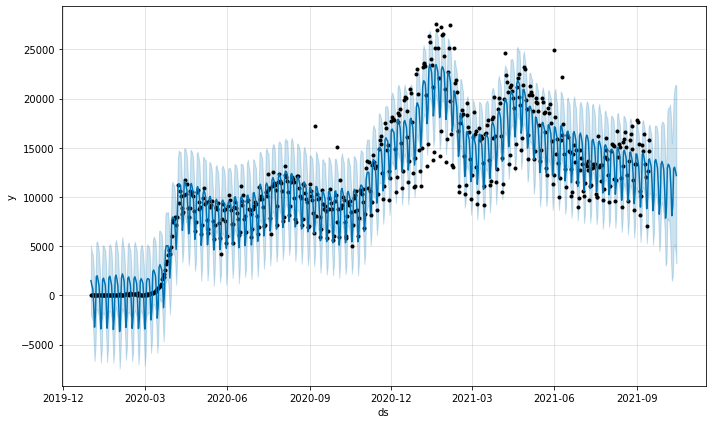

In [45]:
new_deaths_forecast_plot = model.plot(forecast)

Note -: We can see above the number of new_deaths data are represented as black dots and the forecast is a blue line with upper and lower bounds in a blue shaded area.

can look at the various components

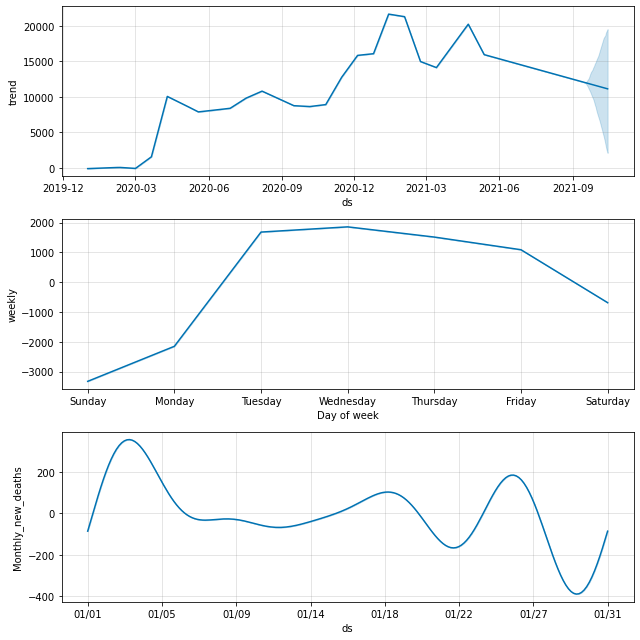

In [46]:
new_deaths_forecast_plot = model.plot_components(forecast)

Notice -: Notice the dips 01/07, 01/12, 01/22. There are also large dips on 01/29. I assume not many workers were working on Christmas and New Year’s day, so reports dipped.

year and monthly trend of covid 19 cases starting from 1st Oct 2020

In [47]:
#how to define range of the date
print("Minimum date :", min(df['date']))
print("Maximum date :", max(df['date']))

Minimum date : 2020-01-01
Maximum date : 2021-09-15


filter the date

In [48]:
startdate = "2020-10-1"
enddate = "2021-09-15"

after_start_date = df["date"] >= startdate 
before_end_date = df["date"] <= enddate
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]

Split the specified dataframe into groups, group by month and year based on order date and find the covid-19 cases year wise, month wise

In [49]:
filtered_dates['date']= pd.to_datetime(filtered_dates['date']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
result = filtered_dates.groupby([filtered_dates['date'].dt.year, filtered_dates['date'].dt.month]).agg({'new_cases':sum})
print(result)

            new_cases
date date            
2020 10    12307859.0
     11    24096700.0
     12    29219157.0
2021 1     29940677.0
     2     16417649.0
     3     20435994.0
     4     28976895.0
     5     25243410.0
     6     17019692.0
     7     21611227.0
     8     27789799.0
     9     12186707.0


Horizontal bar plot in new_cases

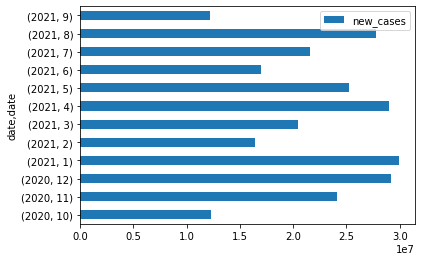

In [51]:
result.plot.barh()

Vertical bar plot from new cases

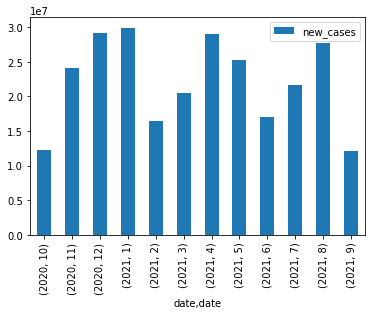

In [52]:
result.plot.bar()

line plot using new_cases

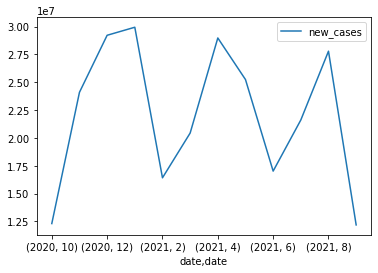

In [53]:
result.plot.line()

Note: Above line plot represnts the monthly and year based on covid-19 cases increasing or decresaing starting
from 1st Oct 2020 to  2021-09-15.